[View in Colaboratory](https://colab.research.google.com/github/cameronmalloy/ESPM155AC/blob/master/ESPM155ACFinalProjectRegressionAvg.ipynb)

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mapping_data.csv to mapping_data.csv


In [3]:
data = pd.read_table('mapping_data.csv', sep=',')
data

,Latitude,Longitude,Prices,Restuarant Name
0,37.863683,-122.258976,2,Kiraku
1,37.868181,-122.267605,2,Angeline's Louisiana Kitchen
2,37.867085,-122.258741,1,KoJa Kitchen
3,37.869939,-122.269000,2,Eureka!
4,37.867682,-122.266158,2,Great China
5,37.870270,-122.267020,3,Ippuku
6,37.868133,-122.267972,1,Toss Noodle Bar
7,37.871468,-122.267555,1,Tharaphu Burmese Street Food
8,37.872553,-122.266746,1,Brazil Fresh Squeeze Cafe
9,37.868068,-122.258124,1,Gypsy's Trattoria Italiano


In [0]:
from math import *
ucb_lon = 122.2585
ucb_lat = 37.8719
def distance(lons, lats):
  lons = abs(lons)
  lats = abs(lats)
  return np.around(np.array((abs(lons - ucb_lon) + abs(lats - ucb_lat)) ** .5), decimals = 2)

In [0]:
distances = distance(data['Longitude'], data['Latitude'])

In [0]:
data['Distances'] = distances

In [0]:
cleaned_data_helper = data[data['Prices'] < 100]

In [14]:
cleaned_data = pd.DataFrame({'Prices' : cleaned_data_helper['Prices'], 'Distances' : cleaned_data_helper['Distances']})
cleaned_data

,Distances,Prices
0,0.09,2
1,0.11,2
2,0.07,1
3,0.11,2
4,0.11,2
5,0.10,3
6,0.12,1
7,0.10,1
8,0.09,1
9,0.06,1


In [15]:
cleaned_data = cleaned_data.groupby('Distances').agg({'Prices' : np.mean})
cleaned_data

,Prices
Distances,
0.06,1.111111
0.07,1.136364
0.08,1.411765
0.09,1.611111
0.10,1.489362
0.11,1.605263
0.12,1.560976
0.13,2.050000
0.14,1.687500


In [0]:
def su(arr):
  return (arr - np.mean(arr)) / np.std(arr)

def correlation(x, y):
  return np.mean(su(x) * su(y))

def slope(x, y):
  return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
  return np.mean(y) - slope(x, y) * np.mean(x)

In [0]:
x_distances = np.arange(0.06, 0.26, 0.01)
y_prices = np.array(cleaned_data[cleaned_data['Prices'] < 3]['Prices'])

m = slope(x_distances, y_prices)
b = intercept(x_distances, y_prices)

def prediction(x):
  return m * x + b

In [20]:
prediction(.05), prediction(.25)

(1.3581838743237713, 1.804042407736711)

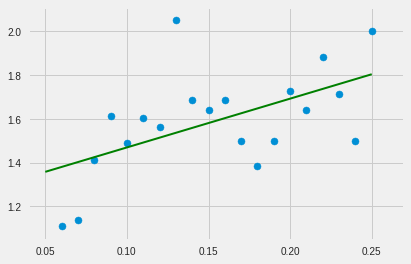

In [21]:
plt.scatter(x_distances, y_prices)
plt.plot([.05, .25], [prediction(.05), prediction(.25)], color='g', linestyle='-', linewidth=2)

In [22]:
values = pd.DataFrame({
    'Distances' : x_distances,
    'Prices' : y_prices,
    'Predicted Prices' : prediction(x_distances),
    'Residuals' : y_prices - prediction(x_distances)
})
values

,Distances,Predicted Prices,Prices,Residuals
0,0.06,1.380477,1.111111,-0.269366
1,0.07,1.402770,1.136364,-0.266406
2,0.08,1.425063,1.411765,-0.013298
3,0.09,1.447356,1.611111,0.163756
4,0.10,1.469649,1.489362,0.019713
5,0.11,1.491941,1.605263,0.113322
6,0.12,1.514234,1.560976,0.046741
7,0.13,1.536527,2.050000,0.513473
8,0.14,1.558820,1.687500,0.128680
9,0.15,1.581113,1.642857,0.061744


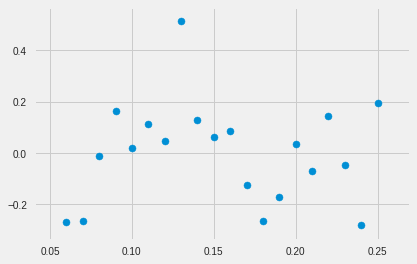

In [23]:
plt.scatter(values['Distances'], values['Residuals'])